In [1]:
import numpy as np
import vedo
import os
from tqdm import tqdm
from MeshObject import *
import pandas as pd
from Pipeline import *

shape_path_orig = "../ShapeDatabase_INFOMR_orig"
# HISTOGRAM FOR EACH NORMALIZATION STEP
# FOR PCA STEP - COMPUTE PCA FIRST, THEN COMPUTE PCA SECOND TIME ON ALIGNED SHAPE = IF DOT PRODUCT IS 1 FOR ONE (OR ALL?) AXIS - IT'S ALL GOOD

In [2]:
def object_statistics(mesh: MeshObject):
    return {
        "name": mesh.name,
        "class": mesh.class_type,
        "nfaces": mesh.n_faces,
        "nvertices": mesh.n_vertices,
        "face_type": mesh.face_type,
        "bounding_box": mesh.bounding_box
    }

def dataset_statistics(shape_path):
    #### BOUNDING BOX!! AXIS ALIGNED VIA XMAX-XMIN - compare with builtin bounds()
    stats = {
        "name": [],
        "class": [],
        "nfaces": [],
        "nvertices": [],
        "face_type": [],
        "bounding_box": []
    }

    # remove any directories that might not contain .obj files
    classes = [class_type for class_type in os.listdir(shape_path_orig) if os.path.isdir((os.path.join(shape_path_orig, class_type))) and class_type != ".git"]
    for class_type in tqdm(classes):
        class_path = os.path.join(shape_path_orig, class_type)

        for obj_name in os.listdir(class_path):
            obj_path = os.path.join(class_path, obj_name)
            obj = MeshObject(obj_path, False, name=obj_name, class_type=class_type)

            # add to global dictionary
            obj_stats = object_statistics(obj)
            for attribute in stats.keys():
                stats[attribute].append(obj_stats[attribute]) 

    return stats

stats = dataset_statistics(shape_path_orig)

100%|██████████| 69/69 [00:44<00:00,  1.55it/s]


In [3]:
df = pd.DataFrame(stats)
# df.to_csv("original_data_statistics.csv", index=False)
df.to_pickle("original_data_statistics.pickle")
df

,name,class,nfaces,nvertices,face_type,bounding_box
0,m433.obj,House,4236,2380,triangle,"[0.025, 0.975, 0.025, 0.224068, 0.025, 0.888636]"
1,m440.obj,House,906,411,triangle,"[0.025, 0.651804, 0.025, 0.465722, 0.025, 0.975]"
2,m448.obj,House,1502,762,triangle,"[0.025, 0.714563, 0.025, 0.975, 0.025, 0.899309]"
3,D00359.obj,House,66144,35522,triangle,"[-1.01194, 0.722748, -0.933903, 0.827164, -0.4..."
4,D00389.obj,House,50407,27493,triangle,"[-1.08453, 0.749038, -0.830679, 0.871337, -0.4..."
...,...,...,...,...,...,...
2478,m666.obj,Gun,26860,13440,triangle,"[0.025, 0.975, 0.025, 0.69407, 0.025, 0.267973]"
2479,D00929.obj,Gun,1394,1026,triangle,"[-0.822144, 1.02365, -0.551779, 0.602898, -0.1..."
2480,m664.obj,Gun,9270,4651,triangle,"[0.025, 0.975, 0.025, 0.721188, 0.025, 0.199559]"
2481,m650.obj,Gun,2464,1460,triangle,"[0.025, 0.975, 0.025, 0.660075, 0.025, 0.158238]"


# Finding different shapes accroding to vertex/face count

In [4]:
from math import ceil
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
avg_vertex_num = np.mean(df.nvertices)
avg_face_num = np.mean(df.nfaces)

vertex_avg = np.argmin([abs(shape-avg_vertex_num) for shape in df.nvertices.to_numpy()])
face_avg = np.argmin([abs(shape-avg_face_num) for shape in df.nfaces.to_numpy()])

vertex_min = np.argmin(df.nvertices.to_numpy())
face_min = np.argmin(df.nfaces.to_numpy())

vertex_max = np.argmax(df.nvertices.to_numpy())
face_max = np.argmax(df.nfaces.to_numpy())

print(f"ID of shape with an average count of vertices {vertex_avg}={df.iloc[vertex_avg].nvertices}, with the average number being {avg_vertex_num:.3f}")
print(f"ID of shape with an average count of vertices {face_avg}={df.iloc[face_avg].nfaces}, with the average number being {avg_face_num:.3f}")
print("-----------------")
print(f"ID of shape with lowest count of vertices {vertex_min}={df.iloc[vertex_min].nvertices}")
print(f"ID of shape with lowest count of faces {face_min}={df.iloc[face_min].nfaces}")
print("-----------------")
print(f"ID of shape with highest count of vertices {vertex_max}={df.iloc[vertex_max].nvertices}")
print(f"ID of shape with highest count of faces {face_max}={df.iloc[face_max].nfaces}")

ID of shape with an average count of vertices 2218=5602, with the average number being 5609.783
ID of shape with an average count of vertices 1921=10692, with the average number being 10691.526
-----------------
ID of shape with lowest count of vertices 761=16
ID of shape with lowest count of faces 761=16
-----------------
ID of shape with highest count of vertices 1406=98256
ID of shape with highest count of faces 1959=129881


## Average shape

In [6]:
avg_shape_vertex = df.iloc[vertex_avg]
avg_shape_face = df.iloc[face_avg]
avg_shape_vertex, avg_shape_face

(name                                                   D00926.obj
 class                                                       Truck
 nfaces                                                      39495
 nvertices                                                    5602
 face_type                                                triangle
 bounding_box    [9.17465, 11.7069, 0.0, 19.3774, 0.00170373, 4...
 Name: 2218, dtype: object,
 name                                                m1659.obj
 class                                                    City
 nfaces                                                  10692
 nvertices                                                5804
 face_type                                            triangle
 bounding_box    [0.025, 0.975, 0.025, 0.345009, 0.025, 0.975]
 Name: 1921, dtype: object)

In [7]:
mesh = MeshObject(os.path.join(shape_path_orig, avg_shape_vertex["class"], avg_shape_vertex["name"]), visualize=True)
mesh.plotter.title = "Average shape in terms of number of vertices"
mesh.show()

In [8]:
mesh = MeshObject(os.path.join(shape_path_orig, avg_shape_face["class"], avg_shape_face["name"]), visualize=True)
mesh.plotter.title = "Average shape in terms of number of faces"
mesh.show()

## Minimum shape

In [9]:
min_shape_vertex = df.iloc[vertex_min]
min_shape_face = df.iloc[face_min]
min_shape_vertex, min_shape_face

(name                                                   D01121.obj
 class                                                        Door
 nfaces                                                         16
 nvertices                                                      16
 face_type                                                triangle
 bounding_box    [0.025, 0.567857, 0.025, 0.975, 0.025, 0.0521429]
 Name: 761, dtype: object,
 name                                                   D01121.obj
 class                                                        Door
 nfaces                                                         16
 nvertices                                                      16
 face_type                                                triangle
 bounding_box    [0.025, 0.567857, 0.025, 0.975, 0.025, 0.0521429]
 Name: 761, dtype: object)

In [10]:
mesh = MeshObject(os.path.join(shape_path_orig, min_shape_vertex["class"], min_shape_vertex["name"]), visualize=True)
mesh.plotter.title = "Smallest shape in terms of number of vertices"
mesh.show()

In [11]:
mesh = MeshObject(os.path.join(shape_path_orig, min_shape_face["class"], min_shape_face["name"]), visualize=True)
mesh.plotter.title = "Smallest shape in terms of number of faces"
mesh.show()

## Maximum

In [12]:
max_shape_vertex = df.iloc[vertex_max]
max_shape_face = df.iloc[face_max]
max_shape_vertex, max_shape_face

(name                                                   D00159.obj
 class                                                PlantIndoors
 nfaces                                                      32752
 nvertices                                                   98256
 face_type                                                triangle
 bounding_box    [-1.02299, 0.735003, -0.76005, 0.812815, -0.76...
 Name: 1406, dtype: object,
 name                                                   m1120.obj
 class                                                    Biplane
 nfaces                                                    129881
 nvertices                                                  65722
 face_type                                               triangle
 bounding_box    [0.025, 0.975, 0.025, 0.370037, 0.025, 0.889139]
 Name: 1959, dtype: object)

In [13]:
mesh = MeshObject(os.path.join(shape_path_orig, max_shape_vertex["class"], max_shape_vertex["name"]), visualize=True)
mesh.plotter.title = "Biggest shape in terms of number of vertices"
mesh.show()

In [14]:
mesh = MeshObject(os.path.join(shape_path_orig, max_shape_face["class"], max_shape_face["name"]), visualize=True)
mesh.plotter.title = "Biggest shape in terms of number of faces"
mesh.show()

In [15]:
df[df["class"] == "Skyscraper"].nvertices.max()

np.int64(73697)

# Overall statistics

In [16]:
def plot_attribute(df, attribute_x, attribute_y, estimator):
    label_name_map = {
        "nvertices": "vertices",
        "nfaces": "faces",
        "class": "shapes"
    }

    aux_df = df
    sns.set_theme(style="whitegrid")

    plt.figure(figsize=(16,9))
    if type(df[attribute_y].iloc[0]) is not str:
        mean_value_attribute = round(np.mean(df[attribute_y]))
        aux_df = df.sort_values(attribute_x, ascending=False).reset_index(drop=True)
        sns.barplot(data=aux_df, x=attribute_x, y=attribute_y, estimator=estimator) # switch to sum/mean - mean might not be best?
    else:
        mean_value_attribute = round(np.mean(aux_df["class"].value_counts()))
        sns.countplot(data=aux_df, x=attribute_x, order=aux_df["class"].value_counts().index) # switch to sum/mean - mean might not be best?
        
    plt.xticks(rotation=90)
    sns.despine()
    if type(df[attribute_y].iloc[0]) is not str:
        plt.text(x=64, y=mean_value_attribute + mean_value_attribute*0.1, s=f"{mean_value_attribute}", color="red")
    else:
        plt.text(x=64, y=mean_value_attribute + 2, s=f"{mean_value_attribute}", color="red")

    plt.hlines(y=mean_value_attribute, xmin=-1, xmax=69, colors="red", linestyles="dashed")
    plt.xlim((-1,69))
    plt.xlabel("Class")
    plt.ylabel(f"Number of {label_name_map[attribute_y]}")
    name = f"beforenorm_{attribute_x}_{attribute_y}_plot.png"
    plt.savefig(name)
    plt.show()

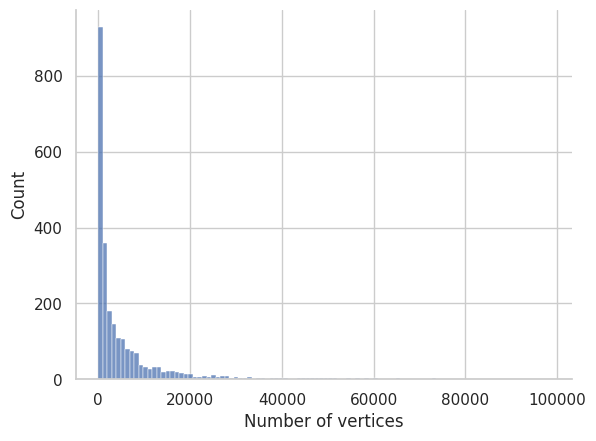

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
sns.histplot(x=df["nvertices"], bins=100)
plt.xlabel("Number of vertices")
sns.despine()
plt.savefig("nvertices_before.png", transparent=True)

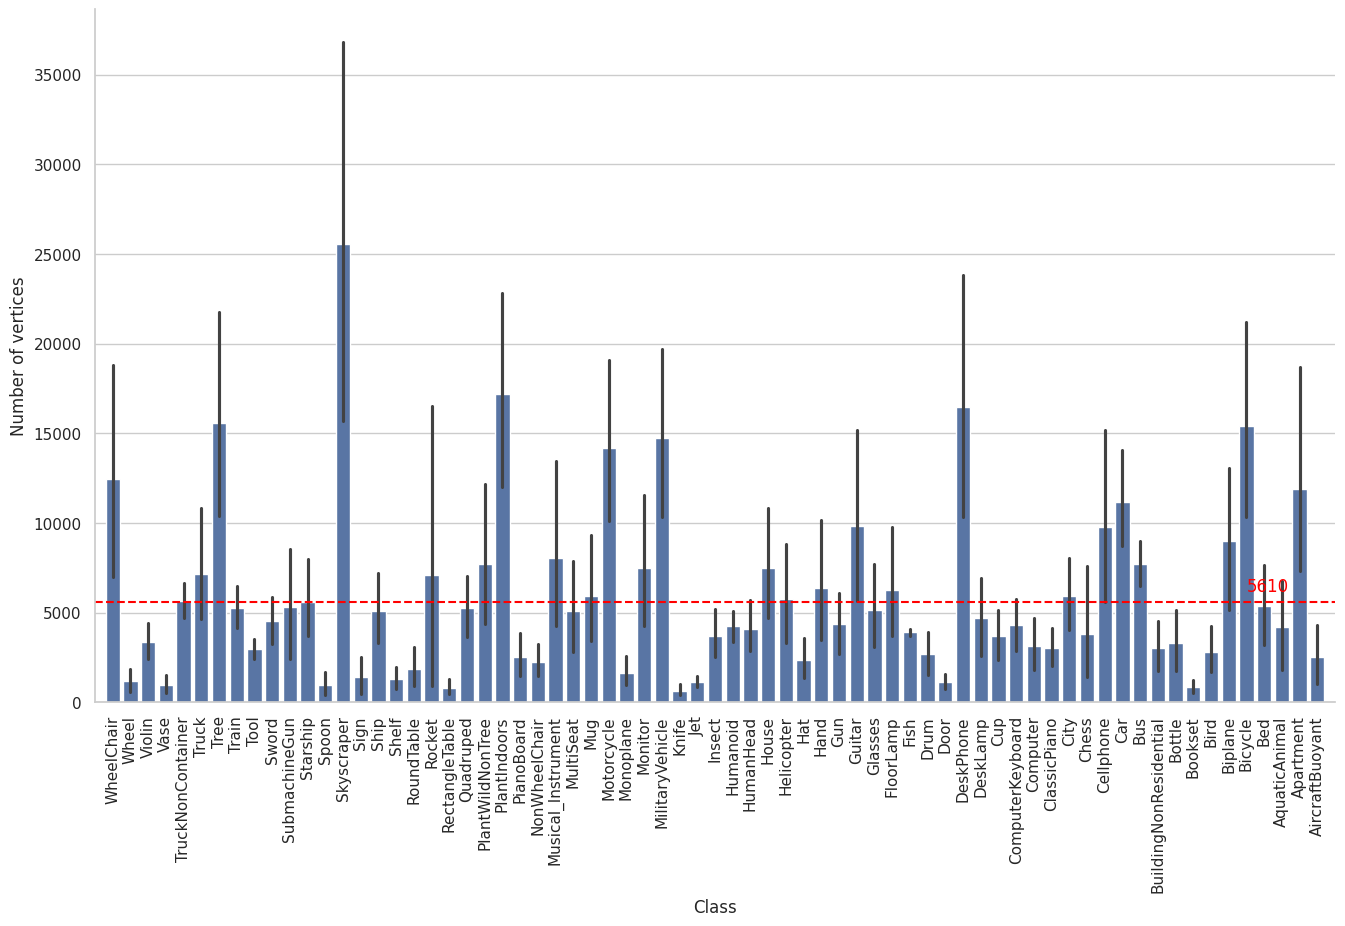

In [18]:
plot_attribute(df, "class", "nvertices", "mean")

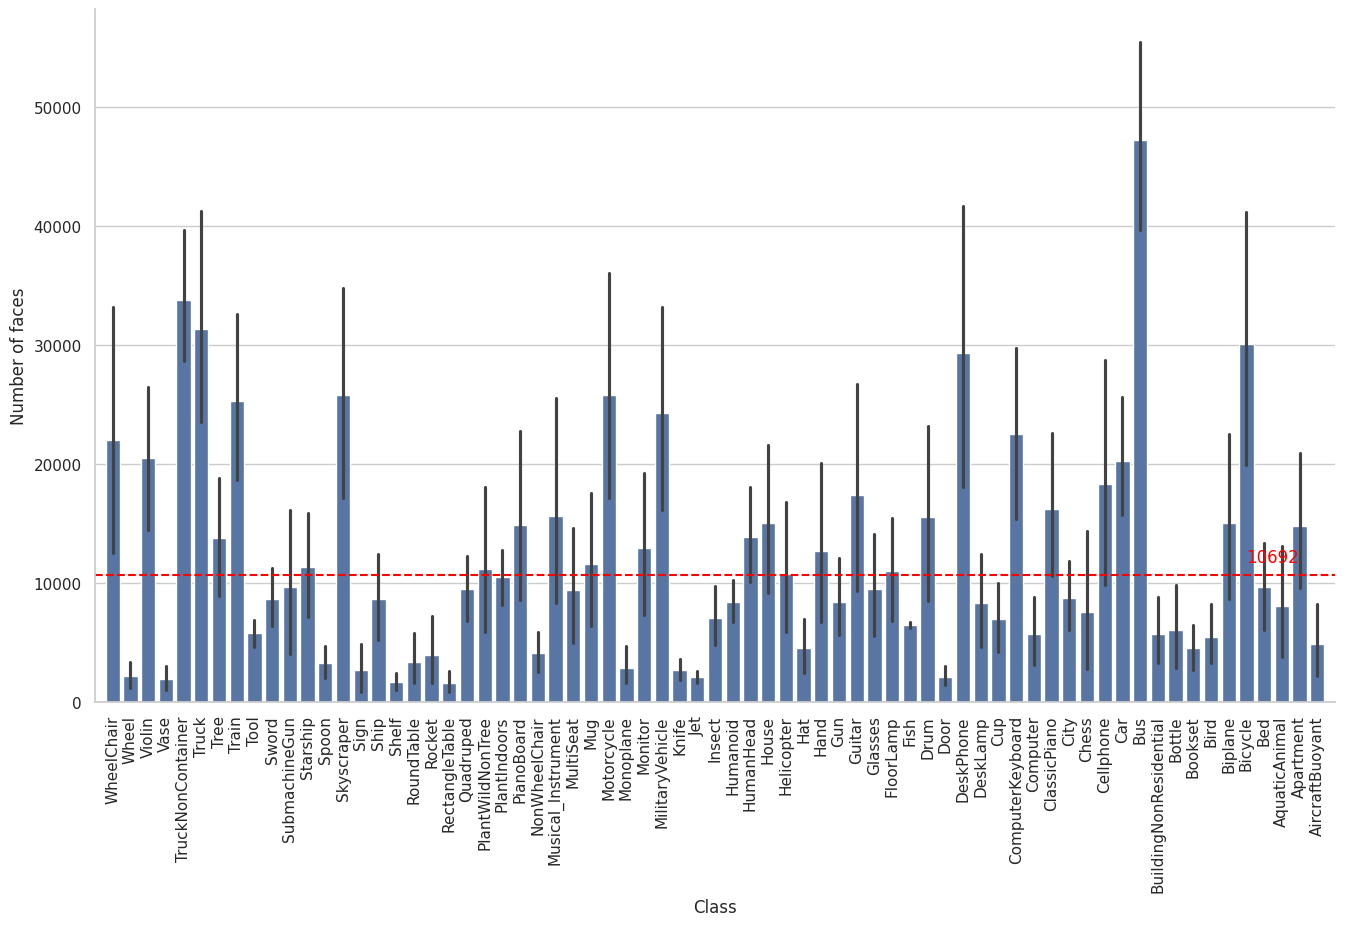

In [19]:
plot_attribute(df, "class", "nfaces", "mean")

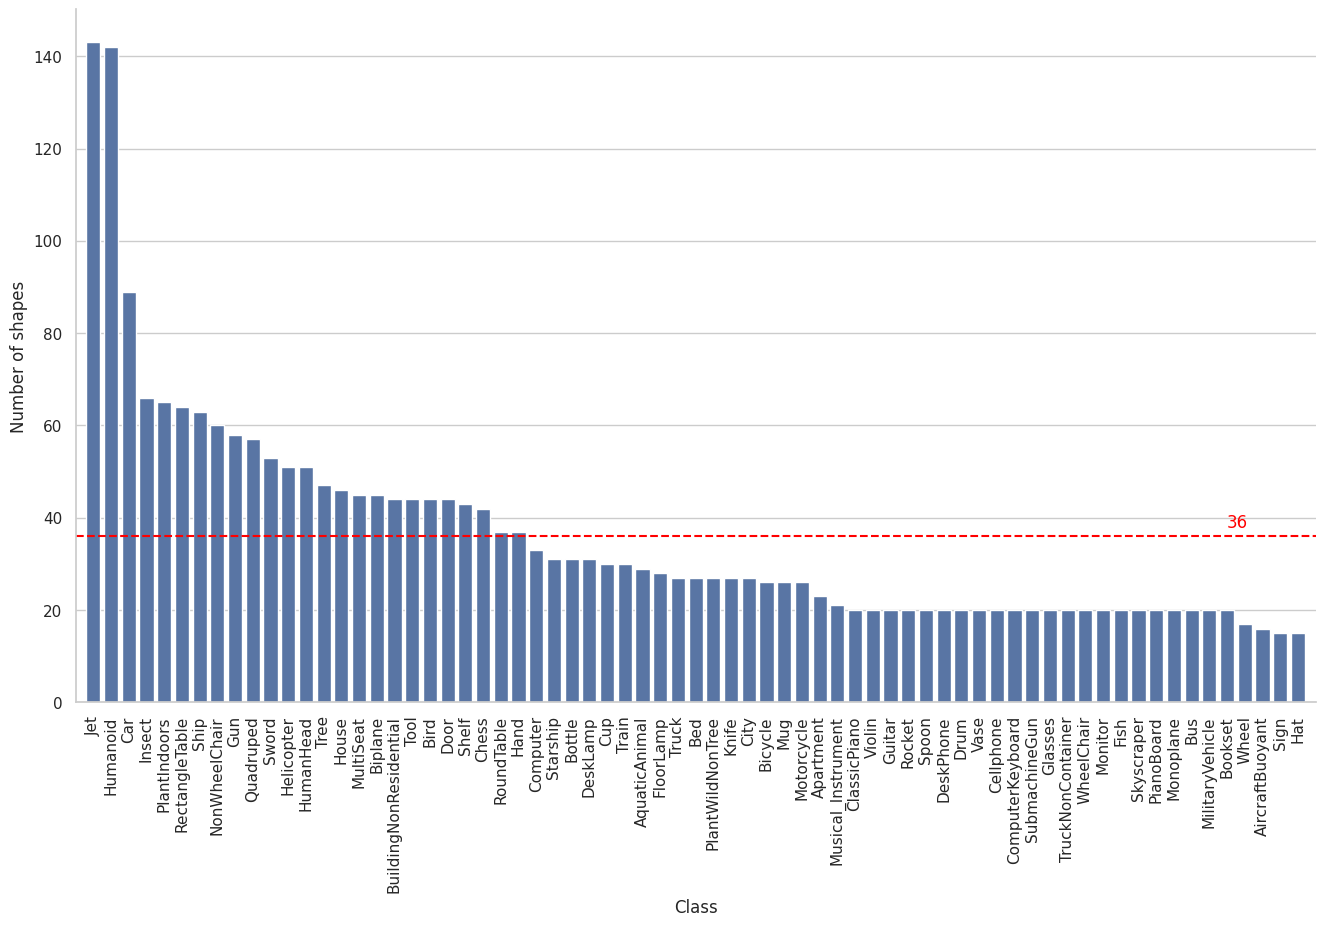

In [20]:
plot_attribute(df, "class", "class", None)